In [2]:
using Yao, CuYao, CUDAnative, CuArrays

In [4]:
using CUDAnative: device!, CuDevice

In [6]:
device!(CuDevice(0))   # change the device number here!
CuArrays.allowscalar(false)

In [8]:
abstract type AbstractQPEPSConfig end
struct QPEPSConfig <: AbstractQPEPSConfig
    nm::Int
    nv::Int
    nrepeat::Int
    depth::Int
end

In [13]:
Yao.nqubits(c::AbstractQPEPSConfig) = (c.nv+1)*nm(c)
nm(c::QPEPSConfig) = c.nm

nm (generic function with 1 method)

In [44]:
function get_register()
    nx = 4
    ny = 4
    nv = 1
    depth = 5
    nbatch = 1024
    use_cuda = true
    config = QPEPSConfig(ny, nv, nx-nv, depth)
    reg0 = zero_state(nqubits(config); nbatch=nbatch)
    reg0 = reg0 |> cu
    return reg0
end

get_register (generic function with 1 method)

In [20]:
rotor(noleading::Bool=false, notrailing::Bool=false) = noleading ? (notrailing ? Rx(0) : chain(Rx(0), Rz(0))) : (notrailing ? chain(Rz(0), Rx(0)) : chain(Rz(0), Rx(0), Rz(0)))

function twoqubit_circuit(nlayer::Int, nrepeat::Int, operator)
    nbit_measure = nbit_virtual = 4
    nbit_used = nbit_measure + nbit_virtual # = 2
    circuit = chain(nbit_used)

    for i=1:nrepeat
        unit = chain(nbit_used)
        #push!(unit, put(nbit_used, 2=>H))
        for j=1:nlayer
            push!(unit, put(nbit_used, 1=>rotor(true, false)))
            push!(unit, put(nbit_used, 2=>H))
            push!(unit, put(nbit_used, 2=>Rz(0.0)))
            push!(unit, control(nbit_used, 1, 2=>shift(0.0)))
            if j == nlayer
                push!(unit, put(nbit_used, 1=>rotor(true, false)))
                push!(unit, put(nbit_used, 2=>H))
                push!(unit, put(nbit_used, 2=>Rz(0.0)))
            end
        end
        #push!(unit, Measure{nbit_used, 1, AbstractBlock}(Z, (1,), 0, false))
        push!(unit, Measure(nbit_used; operator=operator, locs=(1,), resetto=0))
        # GeneralMatrixBlock{Hilbert Dim, Currnet Hilbert Dim, MatrixType??} <: PrimitiveBlock{N}
        # Measure(n::Int; rng=Random.GLOBAL_RNG, operator=ComputationalBasis(), locs=AllLocs(), resetto=nothing, remove=false)
        # resetto: post measured state
        if i==nrepeat # last
            for k=2:nbit_used
                #push!(unit, Measure{nbit_used, 1, AbstractBlock}(Z, (k,), 0, false))
                push!(unit, Measure(nbit_used; operator=operator, locs=(k,), resetto=0))
            end
        end
        push!(circuit, unit)
    end
    dispatch!(circuit, :random)
end

twoqubit_circuit (generic function with 1 method)

In [52]:
# circuit = twoqubit_circuit(1, 1, X)

nbit_used = 8
circuit = chain(nbit_used)
unit = chain(nbit_used)
push!(unit, put(nbit_used, 1=>chain(Rz(0), Rx(0))))
push!(unit, Measure(nbit_used; operator=X, locs=(1,), resetto=0))
push!(circuit, unit)

nqubits: 8
chain
└─ chain
   ├─ put on (1)
   │  └─ chain
   │     ├─ rot(Z, 0.0)
   │     └─ rot(X, 0.0)
   └─ Measure(8;operator=X, locs=(1,), postprocess=ResetTo{BitBasis.BitStr{1,Int64}}(0 ₍₂₎))


In [53]:
reg0 = get_register()
reg0 |> circuit

ArgumentError: ArgumentError: cannot take the CPU address of a CuArray{Complex{Float64},2}

In [2]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [5]:
#E0 = -2.899169921875
#Number of parameters is 180
hist = [-4.3994140625
-5.42333984375
-5.589111328125
-5.791259765625
-6.090087890625
-6.432373046875
-6.421630859375
-6.4775390625
-6.507568359375
-6.535888671875
-6.66015625
-6.6845703125
-6.74658203125
-6.818603515625
-6.719482421875
-6.7802734375
-6.859130859375
-6.80859375
-6.874267578125
-6.8271484375
-6.89599609375
-6.8828125
-6.882080078125
-6.924560546875
-7.005615234375
-6.9228515625
-7.000732421875
-6.975341796875
-6.98095703125
-6.928466796875
-6.8525390625
-6.938720703125
-6.950927734375
-6.941162109375
-7.00390625
-6.970458984375
-7.029541015625
-6.908935546875
-7.08984375
-6.978515625
-7.011962890625
-7.03515625
-6.986572265625
-6.99853515625
-7.028564453125
-7.103271484375
-7.126708984375
-7.0751953125
-7.136474609375
-7.11328125
-7.11572265625
-7.065673828125
-7.1123046875
-7.121826171875
-7.116455078125
-7.083251953125
-7.128173828125
-7.123779296875
-7.1689453125
-7.14892578125
-7.1357421875
-7.1875
-7.093505859375
-7.149658203125
-7.15380859375
-7.1123046875
-7.14599609375
-7.10107421875
-7.216064453125
-7.123046875
-7.1416015625
-7.085693359375
-7.082275390625
-7.17919921875
-7.238037109375
-7.1630859375
-7.201171875
-7.127197265625
-7.140869140625
-7.212890625
-7.20654296875
-7.161865234375
-7.227783203125
-7.131103515625
-7.20751953125
-7.15771484375
-7.1494140625
-7.164794921875
-7.18310546875
-7.20166015625
-7.237548828125
-7.242919921875
-7.19482421875
-7.240966796875
-7.1845703125
-7.276611328125
-7.210205078125
-7.170654296875
-7.222900390625
-7.242431640625
-7.192138671875
-7.197998046875
-7.258056640625
-7.295166015625
-7.267822265625
-7.2939453125
-7.227783203125
-7.2578125
-7.240478515625
-7.279296875
-7.260009765625
-7.299560546875
-7.3203125
-7.345458984375
-7.32763671875
-7.267578125
-7.260986328125
-7.292724609375
-7.2177734375
-7.360595703125
-7.31494140625
-7.356689453125
-7.3984375
-7.28857421875
-7.4091796875
-7.337890625
-7.40966796875
-7.333740234375
-7.343994140625
-7.262939453125
-7.376708984375
-7.342529296875
-7.444580078125
-7.351318359375
-7.352294921875
-7.359130859375
-7.318359375
-7.330078125
-7.3408203125
-7.322021484375
-7.365234375
-7.3916015625
-7.368896484375
-7.414794921875
-7.453369140625
-7.3818359375
-7.31982421875
-7.365234375
-7.447265625
-7.427001953125
-7.36767578125
-7.371826171875
-7.3603515625
-7.383544921875
-7.39794921875
-7.41748046875
-7.384765625
-7.382080078125
-7.380615234375
-7.4013671875
-7.42626953125
-7.37548828125
-7.32177734375
-7.412353515625
-7.460693359375
-7.39990234375
-7.403076171875
-7.41064453125
-7.34326171875
-7.36181640625
-7.36962890625
-7.4619140625
-7.389892578125
-7.446533203125
-7.36865234375
-7.409423828125
-7.39501953125
-7.376220703125
-7.28271484375
-7.34619140625
-7.459228515625
-7.42529296875
-7.4423828125
-7.41650390625
-7.34912109375
-7.450927734375
-7.34619140625
-7.344970703125
-7.431396484375
-7.39599609375
-7.281494140625
-7.4130859375
-7.40478515625
-7.37255859375
-7.374267578125
-7.334228515625
-7.352783203125
-7.42333984375
-7.459716796875
-7.454345703125]


200-element Array{Float64,1}:
 -4.3994140625
 -5.42333984375
 -5.589111328125
 -5.791259765625
 -6.090087890625
 -6.432373046875
 -6.421630859375
 -6.4775390625
 -6.507568359375
 -6.535888671875
 -6.66015625
 -6.6845703125
 -6.74658203125
  ⋮
 -7.431396484375
 -7.39599609375
 -7.281494140625
 -7.4130859375
 -7.40478515625
 -7.37255859375
 -7.374267578125
 -7.334228515625
 -7.352783203125
 -7.42333984375
 -7.459716796875
 -7.454345703125

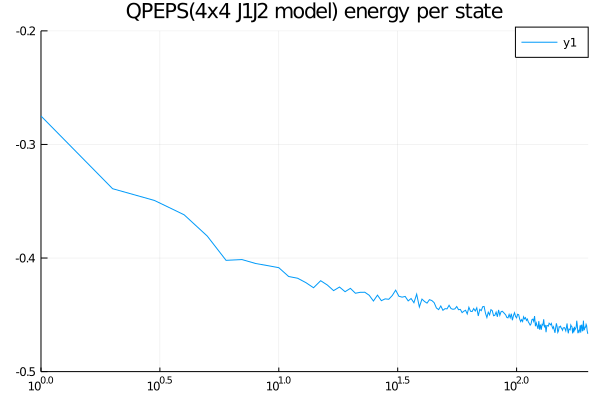

In [14]:
plot(hist / 16, title = "QPEPS(4x4 J1J2 model) energy per state", xlims = (1, 200), ylims = (-0.5, -0.2), xscale=:log10)